# Monty Hall Paradox

- Simulate three doors, one car, and two goats.
- Simulate three players: the switcher, the conservative, and the newcomer.
- Record who wins.
- Repeat it many times.
- Which player do you want to be?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks")
from Utilities import plot_settings

In [5]:
def control(choice, prize):
    "Consistency check: The opened box is not the winning one!"
    if choice == prize:
        return 1  
    else:
        return 0  

In [76]:
N = 3

I need N doors, one of which gets me the prize

In [77]:
boxes = np.zeros(N)  # Array of N empty boxes
prize_box_index = np.random.randint(0, N)  # Index for which the door hides the prize
boxes[prize_box_index] = 1  # Mark the prize door with 1

The first gamer chooses one door randomely

In [78]:
contestant_choice = np.random.randint(0, N)  # Contestant's initial choice

The presenter opens N-2 doors

In [79]:
M = 2  # Number of doors not to open

In [80]:
opened_boxes = np.random.choice(
[i for i in range(N) if i != contestant_choice and i != prize_box_index],
size=N-M, replace=False
)

In [81]:
(contestant_choice in opened_boxes) or (prize_box_index in opened_boxes)

False

Third gamer comes into play, not nowing what happened. He just sees two closed doors

In [82]:
third_gamer_choice =  np.random.choice(
        [i for i in range(N) if i not in opened_boxes],
        size=1, replace=False
    )[0]

Does the first gamer win?

In [83]:
first_gamer = control(contestant_choice, prize_box_index) 
print(f"First contestant's choice: {contestant_choice}, Prize box index: {prize_box_index}, Win: {first_gamer}")

First contestant's choice: 0, Prize box index: 1, Win: 0


The second gamer decides to change its choice

In [84]:
remaining_boxes = [i for i in range(N) if i != contestant_choice and i not in opened_boxes]
new_choice = np.random.choice(remaining_boxes)  
second_gamer = control(new_choice, prize_box_index)
print(f"Second contestant's choice: {new_choice}, Win: {second_gamer}")

Second contestant's choice: 1, Win: 1


Does the third gamer win?

In [85]:
third_gamer = control(third_gamer_choice, prize_box_index) 
print(f"Third contestant's choice: {third_gamer_choice}, Win: {third_gamer}")

Third contestant's choice: 0, Win: 0


Let's do this over and over again, a "trials" times

In [86]:
def game(N, M=2, switch=False):
    """
    Simulates the Monty Hall game.
    Returns the index of the box containing the prize.
    """
    boxes = np.zeros(N)  # Array of N empty boxes
    prize_box_index = np.random.randint(0, N)  # Index if the box containing the prize
    boxes[prize_box_index] = 1  # Mark the prize box with 1
    contestant_choice = np.random.randint(0, N)  # Contestant's initial choice
    
    opened_boxes = np.random.choice(
    [i for i in range(N) if i != contestant_choice and i != prize_box_index],
    size=N-M, replace=False
    ) # the opened boxes should not contain the prize and the contestant's choice
    
    if (contestant_choice in opened_boxes) or (prize_box_index in opened_boxes):
        raise ValueError("Contestant's choice or prize box cannot be in opened boxes.") #just a check...
    
    third_gamer_choice =  np.random.choice(
        [i for i in range(N) if i not in opened_boxes],
        size=1, replace=False
    )[0] # third gamer doesn't know what happend before, he just sees N-M boxes to randomly choose from
    
    first_gamer = control(contestant_choice, prize_box_index) 
    remaining_boxes = [i for i in range(N) if i != contestant_choice and i not in opened_boxes]
    new_choice = np.random.choice(remaining_boxes)  # Contestant switches to one of the remaining boxes
    second_gamer = control(new_choice, prize_box_index)
    third_gamer = control(third_gamer_choice, prize_box_index) 

    return first_gamer, second_gamer, third_gamer

In [87]:
def run_simulation(N, M=2, trials=100):
    """
    Runs the Monty Hall simulation for a given number of trials.
    N: Number of boxes
    trials: Number of game trials
    switch: Whether the contestant switches their choice
    Returns the win rate.
    """
    fg_wins = []
    sg_wins = []
    tg_wins = []
    for _ in range(trials):
        result = game(N, M, False)
        fg_wins.append(result[0])
        sg_wins.append(result[1])
        tg_wins.append(result[2])
    
    no_switch_win_rate = np.array(fg_wins).sum() / trials
    switch_win_rate    = np.array(sg_wins).sum() / trials
    tg_win_rate        = np.array(tg_wins).sum() / trials
    
    print(f'Win rate without switching: {no_switch_win_rate:.2f}')
    print(f'Win rate with switching: {switch_win_rate:.2f}')
    xplot = np.linspace(1,trials+1,trials)
    plt.figure(figsize=(14, 6))
    plt.plot(xplot, np.cumsum(fg_wins)/xplot, label='No Switch Wins', linewidth=2, color='blue')
    plt.plot(xplot, np.cumsum(sg_wins)/xplot, label=f'Switch Wins', linewidth=2, color='orange')
    plt.plot(xplot, np.cumsum(tg_wins)/xplot, label='Third Gamer Wins', linewidth=2, color='green')
    plt.axhline(y=no_switch_win_rate, color='blue', linestyle='--', label=f'No switch win rate : {np.mean(np.cumsum(fg_wins)/xplot):.2}')
    plt.axhline(y=switch_win_rate, color='orange', linestyle='--', label=f'Switch win rate : {np.mean(np.cumsum(sg_wins)/xplot):.2}')
    plt.axhline(y=tg_win_rate, color='green', linestyle='--', label=f'Third gamer win rate : {np.mean(np.cumsum(tg_wins)/xplot):.2}')
    plt.xlabel('Trial Number')
    plt.ylabel('Number of wins')
    plt.title(f'Monty Hall Simulation Results: N = {N}, Opened Doors= {N-M}, Trials = {trials}')
    plt.legend()

    return np.cumsum(fg_wins)/xplot, np.cumsum(sg_wins)/xplot, np.cumsum(tg_wins)/xplot

In [90]:
trials = int(1e5)

Win rate without switching: 0.34
Win rate with switching: 0.66


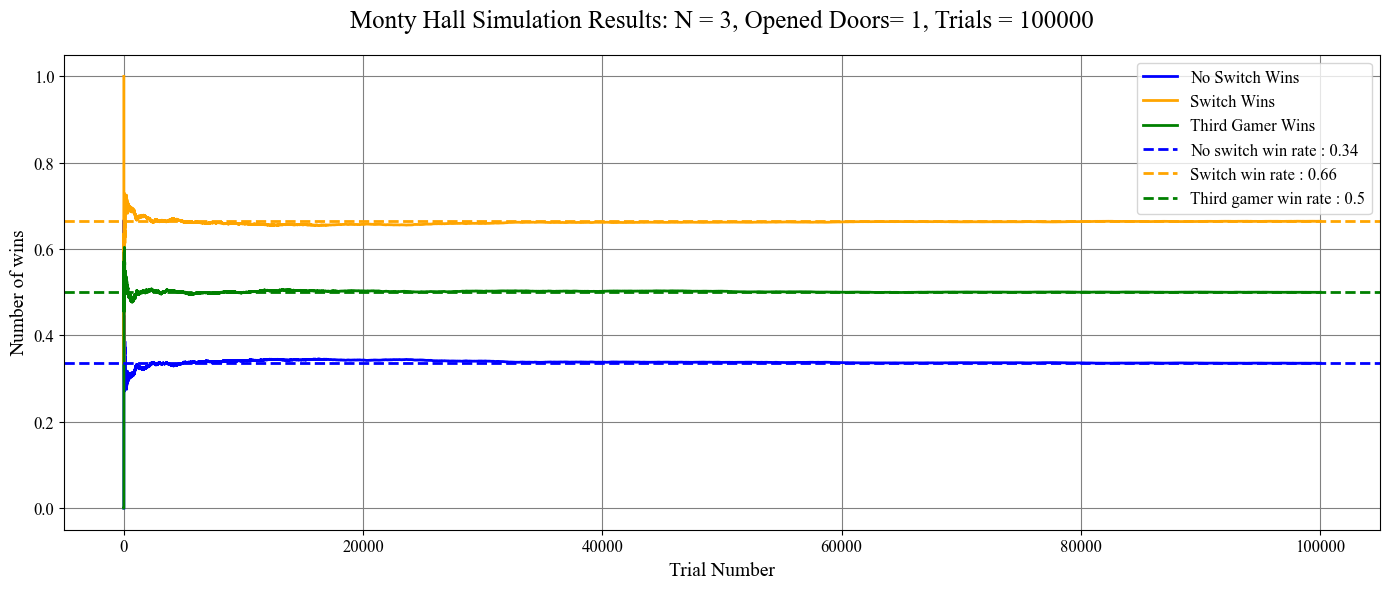

In [93]:
fg, sg, tg = run_simulation(N, M, trials)  # Run the simulation

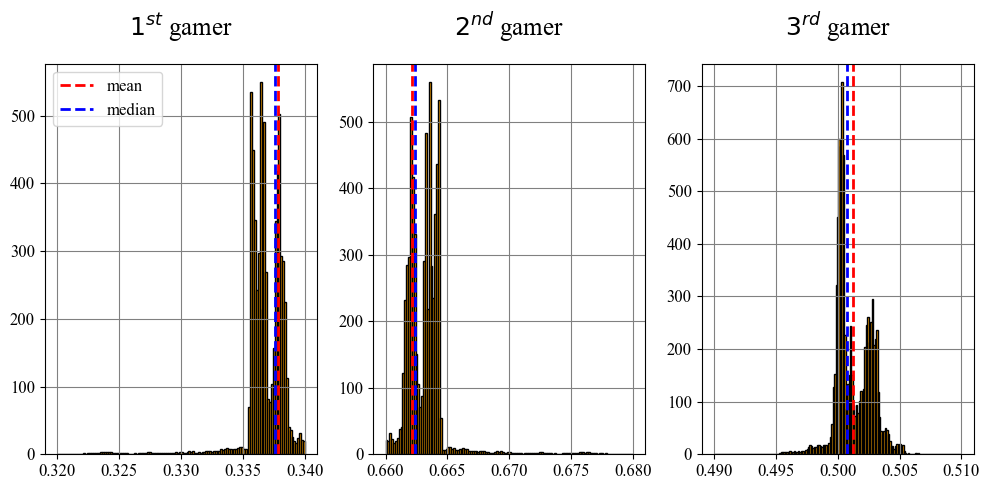

In [94]:
fig, axs = plt.subplots(1, 3)

axs[0].hist(fg, bins='scott', density=True, histtype='barstacked', color='orange', edgecolor='black', range=(0.32, 0.34))
axs[0].axvline(fg.mean(), lw=2, color='red', linestyle='--', label='mean')
axs[0].axvline(np.median(fg), lw=2, color='blue', linestyle='--', label='median')
axs[0].set_title(r'$1^{st}$ gamer')
axs[1].hist(sg, bins='scott', density=True, histtype='barstacked', color='orange', edgecolor='black', range=(0.66, 0.68))
axs[1].axvline(sg.mean(), lw=2, color='red', linestyle='--')
axs[1].axvline(np.median(sg), lw=2, color='blue', linestyle='--')
axs[1].set_title(r'$2^{nd}$ gamer')
axs[2].hist(tg, bins='scott', density=True, histtype='barstacked', color='orange', edgecolor='black', range=(0.49, 0.51))
axs[2].axvline(tg.mean(), lw=2, color='red', linestyle='--')
axs[2].axvline(np.median(tg), lw=2, color='blue', linestyle='--')
axs[2].set_title(r'$3^{rd}$ gamer')
axs[0].legend()